In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


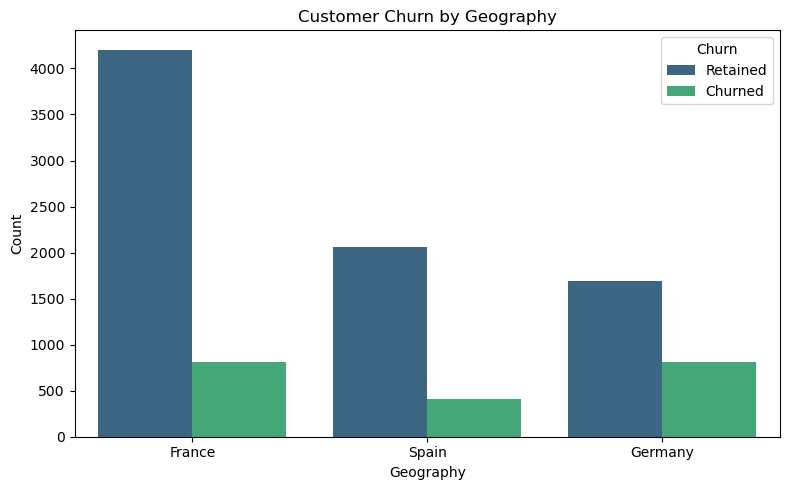

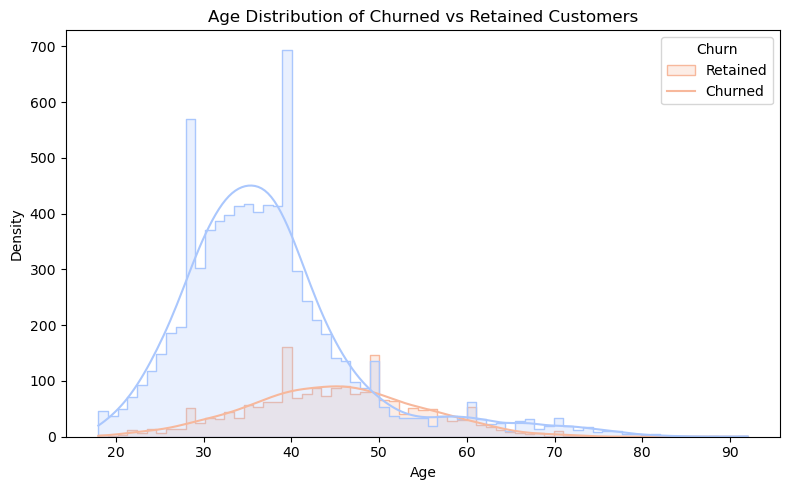

C:\Users\hello\AppData\Local\Temp\ipykernel_37984\3604474931.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='mako')


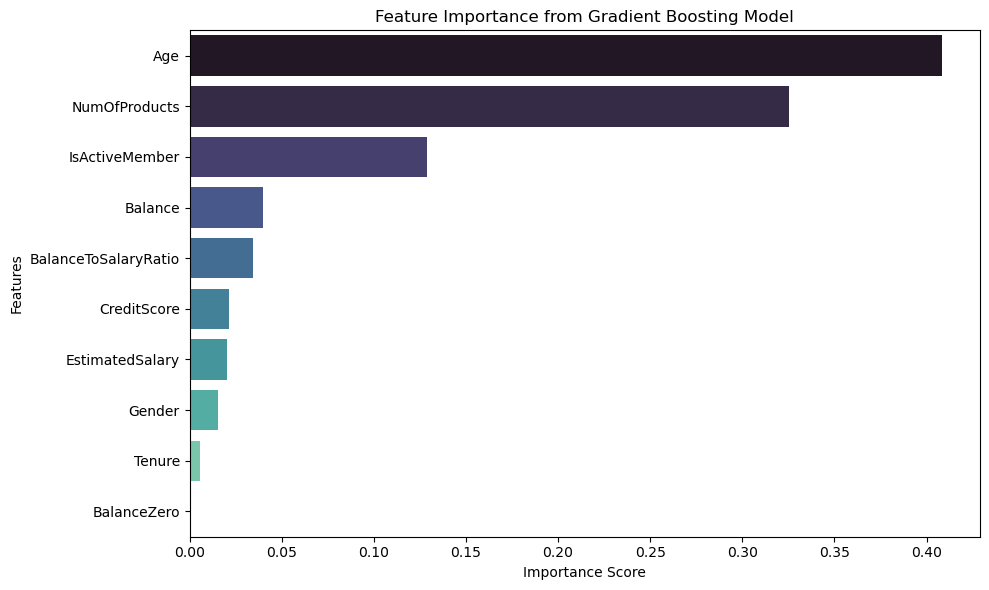

In [8]:
data = pd.read_csv('C:/Users/hello/OneDrive/Documents/GitHub/customer-churn/churn-data/Churn_Modelling.csv')
data.head(10)

# Basic preprocessing
data['BalanceZero'] = (data['Balance'] == 0).astype(int)
data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 95],
                          labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-95'])
data['BalanceToSalaryRatio'] = data['Balance'] / data['EstimatedSalary']
data['ProductUsage'] = data['NumOfProducts'] * data['IsActiveMember']
data['TenureGroup'] = pd.cut(data['Tenure'], bins=[0, 2, 5, 7, 10],
                             labels=['0-2', '3-5', '6-7', '8-10'])

# Churn by Geography
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Geography', hue='Exited', palette='viridis')
plt.title('Customer Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.tight_layout()
plt.savefig('./images/Churn_by_Geography.png')
plt.show()

# Age Distribution of Churned vs Retained Customers
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Age', hue='Exited', kde=True, element='step', palette='coolwarm')
plt.title('Age Distribution of Churned vs Retained Customers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.tight_layout()
plt.savefig('./images/Age_Distribution_Churn.png')
plt.show()

# Encoding categorical variables
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

# Model training to determine feature importance
X = data[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
          'IsActiveMember', 'EstimatedSalary', 'BalanceZero', 'BalanceToSalaryRatio']]
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plotting feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='mako')
plt.title('Feature Importance from Gradient Boosting Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('./images/Feature_Importance.png')
plt.show()
